# Recomendação de filmes 

In [1]:
#Importando as bibliotecas 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Carregando os dados 
movies = pd.read_csv("./Data/movies.csv").set_index("movieId")
ratings = pd.read_csv("./Data/ratings.csv")

In [3]:
#Vendo os primeiros dados de movies 
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [4]:
#Vendo os primeiros dados de rating 
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Sistema de recomendação por popularidade

In [5]:
#Defindo filmes populares como aqueles que mais obtiveram notas
popularity = ratings["movieId"].value_counts()

In [6]:
#Acrescendo a popularidae nos dados dos filmes 
movies['Popularity'] = popularity

In [7]:
#Vendo os filmes mais populares 
movies.sort_values(by='Popularity', ascending=False)

,title,genres,Popularity
movieId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
32160,Twentieth Century (1934),Comedy,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN


## Sistema de recomendação baseado na nota média

In [8]:
#Fazendo o groupby das médias
nota_media = ratings.groupby('movieId')["rating"].mean()

In [9]:
#Acrescentando notas médias ao dados
movies["Medium_rating"] = nota_media

#Vendo os dados com as maiores médias 
movies.head().sort_values('Medium_rating', ascending=False)

,title,genres,Popularity,Medium_rating
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143


In [10]:
#Acrescentando condição para mostar apenas filmes com mais de 50 votos 
movies_more_50 = movies.query("Popularity > 50").sort_values('Medium_rating', ascending=False)
movies_more_50.head(10)

,title,genres,Popularity,Medium_rating
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


## Sistema de recomendação baseado em gênero

In [11]:
#Protótipo simples de um sistema de recomendação baseado em gêneros iguais 
movies_that_I_watched = [3,5,10,25,335,154]

In [12]:
#Verificando os filmes que eu assiti
movies.loc[movies_that_I_watched]

,title,genres,Popularity,Medium_rating
movieId,,,,
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
25,Leaving Las Vegas (1995),Drama|Romance,76.0,3.625000
335,Underneath (1995),Mystery|Thriller,2.0,3.500000
154,Beauty of the Day (Belle de jour) (1967),Drama,12.0,3.875000


In [13]:
#Pegando como exemplo o gênero do primeiro filme 
#Vendo os principais filmes com o gênero 
movies.query("genres == 'Comedy|Romance'").head(10)

,title,genres,Popularity,Medium_rating
movieId,,,,
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
39,Clueless (1995),Comedy|Romance,104.0,3.293269
64,Two if by Sea (1996),Comedy|Romance,5.0,2.200000
68,French Twist (Gazon maudit) (1995),Comedy|Romance,5.0,3.400000
118,If Lucy Fell (1996),Comedy|Romance,2.0,2.500000
122,Boomerang (1992),Comedy|Romance,16.0,2.656250
129,Pie in the Sky (1996),Comedy|Romance,1.0,2.000000
180,Mallrats (1995),Comedy|Romance,36.0,3.402778


In [14]:
#Pegando apenas os filmes com mais de 50 
romance_comedy = movies_more_50.query("genres == 'Comedy|Romance'").head(10)
#Retirando os filmes que eu já vi (drop) 
romance_comedy.drop(movies_that_I_watched, errors='ignore')

,title,genres,Popularity,Medium_rating
movieId,,,,
4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,120.0,4.183333
1230,Annie Hall (1977),Comedy|Romance,58.0,3.870690
1307,When Harry Met Sally... (1989),Comedy|Romance,85.0,3.858824
1923,There's Something About Mary (1998),Comedy|Romance,105.0,3.676190
35836,"40-Year-Old Virgin, The (2005)",Comedy|Romance,74.0,3.547297
440,Dave (1993),Comedy|Romance,76.0,3.546053
2572,10 Things I Hate About You (1999),Comedy|Romance,54.0,3.527778
357,Four Weddings and a Funeral (1994),Comedy|Romance,103.0,3.519417
34162,Wedding Crashers (2005),Comedy|Romance,58.0,3.508621


## Usando a distância de usuários para utilizar no sistema de recomendação

#### Vamos supor que existam tais usuários 
#### João deu nota 4 para o filme A e 4,5 para o filme B
#### Maria deu nota 5 para o filme A e 5 para o filme B
#### Paulo deu nota 3 para o filme A
#### Fernanda deu nota 3,5 para o filma A

#### Como podemos utilizar essa diferença para ajudar no sistema de recomendação?

Text(0.5, 1.0, 'Diferença de usuário')

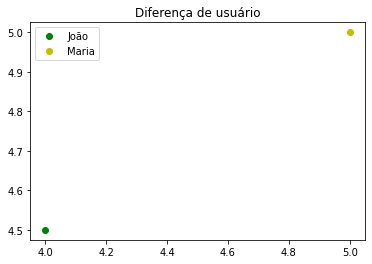

In [15]:
#Entendendo a diferença da distância entre as pessoas utilizando joão e Maria como exemplo 

#Vendo a distância no gráfico 
plt.plot(4, 4.5, 'go')
plt.plot(5,5,'yo')
plt.legend(["João","Maria"])
plt.title("Diferença de usuário")

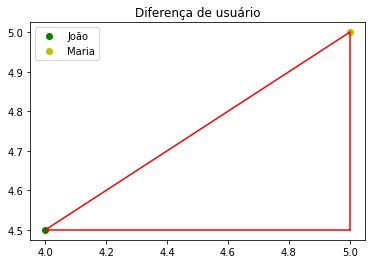

In [16]:
#Vendo utilizadno geometria a diferença, será necessário o calculo da Hipotenusa do triângulo formado pela distância dos usuários
plt.plot(4, 4.5, 'go')
plt.plot(5,5,'yo')
plt.legend(["João","Maria"])
plt.title("Diferença de usuário")

#Fazendo o triangulo 
plt.plot([4,5], [4.5,4.5], color='red', linestyle="-")
plt.plot([4,5], [4.5,5], color='red',linestyle="-")
plt.plot([5,5], [5,4.5], color='red',linestyle="-")

In [17]:
#Fazendo a função do numpy para fazer o cáluclo da hipetenusa do triangulo
joao = np.array([4,4.5])
maria = np.array([5,5])

#Utilizando a função 
np.linalg.norm(joao - maria)

1.118033988749895

In [18]:
#Fazendo a função para calcular a distância dos vetores 
def diferenca_de_vetores(a,b):
    return np.linalg.norm(a - b)

In [19]:
#Testando a função 
diferenca_de_vetores(joao, maria)

1.118033988749895

In [20]:
#Implementação da distância de usuários baseado no dataset 
#Utilizando os filmes vistos pelos usuários dentro do dataset 
#Usando o usuário 1 
notas_do_usuario_1 = ratings.query('userId==1')

#Pegando apenas a colunas de filmes e notas
notas_do_usuario_1[['movieId','rating']].set_index("movieId")

,rating
movieId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [21]:
#Criando a funcão 
def notas_do_usuario(user_id):
    notas_do_usuario = ratings.query("userId =={}".format(user_id))
    notas_do_usuario = notas_do_usuario[['movieId','rating']].set_index('movieId')
    return notas_do_usuario

In [22]:
#Testando as notas 
notas_do_usuario(1)

,rating
movieId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [23]:
#Pegando notas de dois usuários 
usuarios1 = notas_do_usuario(1)
usuarios4 = notas_do_usuario(4)

In [24]:
#Fazendo o join para ver os filmes em comum 
usuarios1.join(usuarios4, lsuffix="_user1", rsuffix="_user2")

,rating_user1,rating_user2
movieId,,
1,4.0,NaN
3,4.0,NaN
6,4.0,NaN
47,5.0,2.0
50,5.0,NaN
...,...,...
3744,4.0,NaN
3793,5.0,NaN
3809,4.0,3.0


In [25]:
#Deletando os valores Nan já que apenas precisamos do filme em comum do primeiro usuário 
diferenca = usuarios1.join(usuarios4, lsuffix="_user1", rsuffix="_user2").dropna()

In [26]:
#Calculando a diferença com base do total de notas dos usuários
diferenca_1 = diferenca['rating_user1']
diferenca_2 = diferenca['rating_user2']

#Calculando a diferença
diferenca_de_vetores(diferenca_1,diferenca_2)

11.135528725660043

In [27]:
#Fazendo a função completa para calcular a diferença de dois usuários
def diferenca_de_user(userid1,userid2):
    #Pegando as notas
    rating_1 = notas_do_usuario(userid1)
    rating_2 = notas_do_usuario(userid2)

    #Criando o dataset único 
    notas_total = rating_1.join(rating_2, lsuffix='_user1', rsuffix='_user2').dropna()

    #Pegando apenas usuários que tiveram mais de 5 filmes assistidos em comum
    if (len(notas_total) < 5):
        return [userid1, userid2, 100000]

    #Calculando a diferença total de usuário
    return [userid1, userid2, diferenca_de_vetores(notas_total['rating_user1'], notas_total['rating_user2'])]

In [50]:
#Testando a função 
diferenca_de_user(1,4)

[1, 4, 9.899494936611665]

In [29]:
#Agora fazendo a função para ver qual é a distância em comapração com todos os usuários dentro do dataset 

#Vendo o total de usários dentro do dataset 
total_de_users = len(ratings['userId'].unique())
print("Há {} usuários dentro do dataset".format(total_de_users))

Há 610 usuários dentro do dataset


In [30]:
#Fazendo a função para rodar a diferença com todos os usuarios
def diferenca_com_todos(userid):
    diferencas = []

    for usuarios in ratings['userId'].unique():
        diferencas.append(diferenca_de_user(userid, usuarios))

    diferencas = pd.DataFrame(diferencas, columns= ['User1', 'User2', 'distancia'])
    diferencas = diferencas.sort_values(by='distancia').set_index('User2')
    diferencas = diferencas.drop(userid)
    
    return diferencas

In [31]:
diferenca_com_todos(1).head()

,User1,distancia
User2,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000


In [32]:
#Criando a função para pegar apenas os usuários mais próximos 
def mais_proximos_usuarios(userid):

    #Fazendo a distância com o numero de usuários
    distancias = diferenca_com_todos(userid)
    distancias = distancias.sort_values(by='distancia')
    
    return distancias

In [33]:
#Testando a função 
mais_proximos_usuarios(1)

,User1,distancia
User2,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
...,...,...
252,1,100000.000000
253,1,100000.000000
358,1,100000.000000


In [34]:
#Mudando o cálculo de distância para mostrar apenas os usuários mais perto e sem o 100000
def diferenca_de_user(userid1,userid2):
    #Pegando as notas
    rating_1 = notas_do_usuario(userid1)
    rating_2 = notas_do_usuario(userid2)

    #Criando o dataset único 
    notas_total = rating_1.join(rating_2, lsuffix='_user1', rsuffix='_user2').dropna()

    #Pegando apenas usuários que tiveram mais de 5 filmes assistidos em comum
    if (len(notas_total) < 5):
        return None

    #Calculando a diferença total de usuário
    return [userid1, userid2, diferenca_de_vetores(notas_total['rating_user1'], notas_total['rating_user2'])]

In [35]:
#Filtro para pegar apenas os usuários pertos
def diferenca_com_todos(userid):
    diferencas = []

    for usuarios in ratings['userId'].unique():
        diferencas.append(diferenca_de_user(userid, usuarios))

    diferencas = list(filter(None, diferencas))
    diferencas = pd.DataFrame(diferencas, columns= ['User1', 'User2', 'distancia'])
    diferencas = diferencas.sort_values(by='distancia').set_index('User2')
    diferencas = diferencas.drop(userid)
    
    return diferencas

In [36]:
#Fazendo a função dos mais próximos
mais_proximos_usuarios(1)

,User1,distancia
User2,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
258,1,1.000000
9,1,1.000000
...,...,...
474,1,18.594354
160,1,18.794946
217,1,19.646883


In [37]:
#Pegando o primeiro usuário que é o mais similar 
user1 = 1
similares = mais_proximos_usuarios(user1)
similar = similares.iloc[0].name

#Pegando as notas do usuário do similiar 
notas_similar = notas_do_usuario(similar)
notas_do_user = notas_do_usuario(user1)

#Pegando as notas do similiar menos do filme que o usuário já viu
recomendacoes = notas_similar.drop(notas_do_user.index, errors='ignore').sort_values('rating', ascending=False)

#Colocando os nomes do filme 
recomendacoes = recomendacoes.join(movies['title'])
recomendacoes.head()


,rating,title
movieId,,
8636,5.0,Spider-Man 2 (2004)
58559,5.0,"Dark Knight, The (2008)"
33794,5.0,Batman Begins (2005)
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,..."
5349,5.0,Spider-Man (2002)


In [38]:
#Fazendo a função com o conceito de KNN, de várias notas médias de usuários agrupados com a função de similar 
#Arrumando a função 
def mais_proximos_usuarios(userid, n_mais_proximos = 10):

    #Fazendo a distância com o numero de usuários
    distancias = diferenca_com_todos(userid)
    distancias = distancias.sort_values(by='distancia')
    
    return distancias.head(n_mais_proximos)

In [39]:
mais_proximos_usuarios(1, n_mais_proximos=2)

,User1,distancia
User2,,
77,1,0.0
511,1,0.5


In [40]:
#Pegando o primeiro usuário que é o mais similar 
user1 = 1
n_mais_proximos = 2
similares = mais_proximos_usuarios(user1, n_mais_proximos=n_mais_proximos)
usuarios_similares = similares.index
notas_dos_usuarios_similares = ratings.set_index('userId').loc[usuarios_similares]
recomendacoes = notas_dos_usuarios_similares.groupby('movieId')[['rating']].mean()
recomendacoes = recomendacoes.sort_values('rating', ascending=False)
recomendacoes = recomendacoes.join(movies).head()
recomendacoes

,rating,title,genres,Popularity,Medium_rating
movieId,,,,,
260,5.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
8961,5.0,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,125.0,3.836000
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277
5816,5.0,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,102.0,3.598039


In [41]:
#Pegando o primeiro usuário que é o mais similar 
def recomendacoes_user(userid, n_mais_proximos = 5):
    similares = mais_proximos_usuarios(userid, n_mais_proximos=n_mais_proximos)
    usuarios_similares = similares.index
    notas_dos_usuarios_similares = ratings.set_index('userId').loc[usuarios_similares]
    recomendacoes = notas_dos_usuarios_similares.groupby('movieId')[['rating']].mean()
    recomendacoes = recomendacoes.sort_values('rating', ascending=False)
    recomendacoes = recomendacoes.join(movies)
    return recomendacoes

### Criando novo usuário e contruindo algoritmo 

In [42]:
#Dando notas de maneira aleatória
dados = ([
    [122904,2],
    [1246,5],
    [2529,2],
    [2329,5],
    [2324,5],
    [1,2],
    [7,0.5],
    [2,2],
    [1196,1],
    [260,1]
])

In [43]:
def new_user(dados):

    #Criando o id do usuário com base no dataframe
    iduser = ratings['userId'].max()+1

    #Criando dataframe
    notas_do_usuario_novo = pd.DataFrame(dados, columns=['movieId', 'rating'])
    notas_do_usuario_novo['userId'] = iduser

    return pd.concat([ratings, notas_do_usuario_novo])

In [44]:
ratings = new_user(dados)
ratings.tail()

,userId,movieId,rating,timestamp
5,611,1,2.0,NaN
6,611,7,0.5,NaN
7,611,2,2.0,NaN
8,611,1196,1.0,NaN
9,611,260,1.0,NaN


In [45]:
recomendacoes_user(611).head()

,rating,title,genres,Popularity,Medium_rating
movieId,,,,,
51931,5.0,Reign Over Me (2007),Drama,5.0,4.100000
1835,5.0,City of Angels (1998),Drama|Fantasy|Romance,17.0,3.382353
57274,5.0,[REC] (2007),Drama|Horror|Thriller,8.0,4.062500
663,5.0,Kids in the Hall: Brain Candy (1996),Comedy,12.0,3.291667
1031,5.0,Bedknobs and Broomsticks (1971),Adventure|Children|Musical,24.0,3.479167


In [46]:
#Fazendo o sugere apenas com filmes com mais de 50 votos
ratings = ratings.set_index('movieId').loc[movies_more_50.index]
ratings = ratings.reset_index()
ratings.head()

,movieId,userId,rating,timestamp
0,318,2,3.0,1.445715e+09
1,318,5,3.0,8.474349e+08
2,318,6,5.0,8.455532e+08
3,318,8,5.0,8.394635e+08
4,318,11,4.0,9.021551e+08


In [47]:
#Fazendo a sugestação de novo 
recomendacoes_user(611).head()

,rating,title,genres,Popularity,Medium_rating
movieId,,,,,
3535,5.00,American Psycho (2000),Crime|Horror|Mystery|Thriller,59.0,3.788136
59315,4.75,Iron Man (2008),Action|Adventure|Sci-Fi,94.0,3.824468
69122,4.75,"Hangover, The (2009)",Comedy|Crime,76.0,3.631579
1247,4.50,"Graduate, The (1967)",Comedy|Drama|Romance,79.0,4.063291
2268,4.50,"Few Good Men, A (1992)",Crime|Drama|Thriller,57.0,3.789474


In [48]:
#Arrumando a função para pegar apenas os filmes que não foram visto apenas por uma pessoa
def recomendacoes_user(userid, n_mais_proximos = 10):
    similares = mais_proximos_usuarios(userid, n_mais_proximos=n_mais_proximos)
    usuarios_similares = similares.index
    notas_dos_usuarios_similares = ratings.set_index('userId').loc[usuarios_similares]
    recomendacoes = notas_dos_usuarios_similares.groupby('movieId')[['rating']].mean()
    aparicoes = notas_dos_usuarios_similares.groupby('movieId')[['rating']].count()

    filtro_minimo = n_mais_proximos / 2
    
    recomendacoes = recomendacoes.join(aparicoes, lsuffix="_media_dos_users", rsuffix="_aparicoes_filmes")
    recomendacoes = recomendacoes.query('rating_aparicoes_filmes >= {:.2f}'.format(filtro_minimo))
    recomendacoes = recomendacoes.sort_values('rating_aparicoes_filmes', ascending=True)
    recomendacoes = recomendacoes.join(movies)
    return recomendacoes

In [49]:
recomendacoes_user(611).head()

,rating_media_dos_users,rating_aparicoes_filmes,title,genres,Popularity,Medium_rating
movieId,,,,,,
1270,3.7,5,Back to the Future (1985),Adventure|Comedy|Sci-Fi,171.0,4.038012
1997,3.9,5,"Exorcist, The (1973)",Horror|Mystery,53.0,3.801887
5418,3.8,5,"Bourne Identity, The (2002)",Action|Mystery|Thriller,112.0,3.816964
5481,2.3,5,Austin Powers in Goldmember (2002),Comedy,65.0,2.846154
1784,3.3,5,As Good as It Gets (1997),Comedy|Drama|Romance,96.0,3.697917
